In [3]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from diffusers import StableDiffusionPipeline
import torch

/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
output_dir="/home/ricardo/master_thesis/extra_materials/Diffusion_models_HF_course/results/cansu"
pipe = StableDiffusionPipeline.from_pretrained(output_dir, safety_checker=None, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator(device='cuda')
seed = 52362
generator.manual_seed(seed)

/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [15]:
prompt = "Portrait of ukj female person as white and black hedcut illustrations pencil sketch by Noli Novakovsky, Dimitri Desiron and Antonio Lopez Garcia, trending on artstation, featured on pixiv, surrealism, official art, deviantart  Portrait of tom cruise as white and black hedcut illustrations pencil sketch by Noli Novakovsky in Star Wars adventure time, LSD therapy. oil painting, highly detailed, centered, artstation, concept art, smooth, sharp focus illustration, artgerm, vermeer, hans holbein, titian, salvador dali, hieronymus bosch, frans hals, rembrandt  Portrait of tom cruise as white and black hedcut illustrations pencil sketch by Noli Novak, old man behind him, 4k, intricate details, highly detailed, trending on artstation  Portrait of tom cruise as white and black hedcut illustrations pencil sketch by Noli Novakovsky trending on artstation skeb pixiv cinematic backlit smoke noir technoir detailed"
negative_prompt = ""
num_samples = 4
guidance_scale = 9
num_inference_steps = 50
size = 512
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    height=size,
    width=size,
    generator=generator,
).images

for img in image:
    display(img)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. oil painting, highly detailed, centered, artstation, concept art, smooth, sharp focus illustration, artgerm, vermeer, hans holbein, titian, salvador dali, hieronymus bosch, frans hals, rembrandt portrait of tom cruise as white and black hedcut illustrations pencil sketch by noli novak, old man behind him, 4 k, intricate details, highly detailed, trending on artstation portrait of tom cruise as white and black hedcut illustrations pencil sketch by noli novakovsky trending on artstation skeb pixiv cinematic backlit smoke noir technoir detailed']
100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


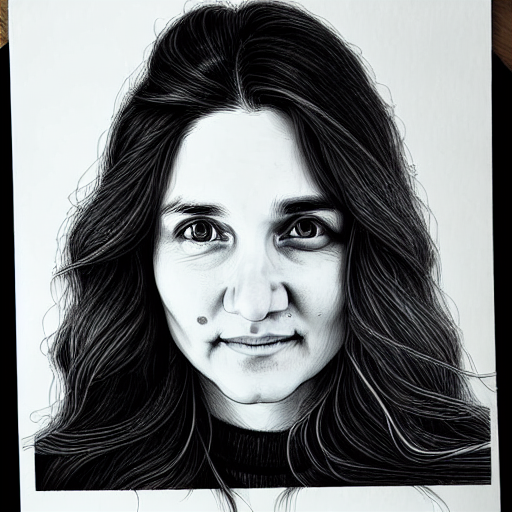

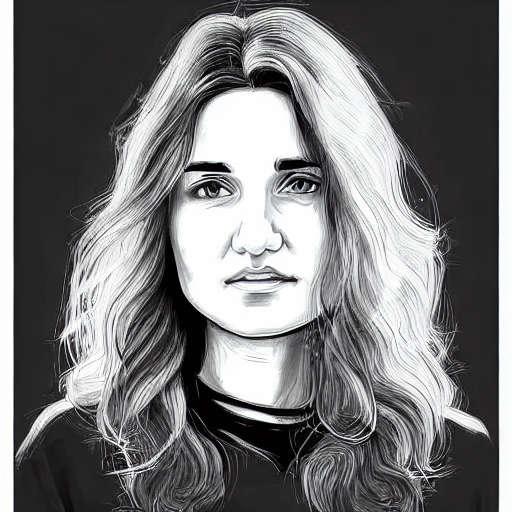

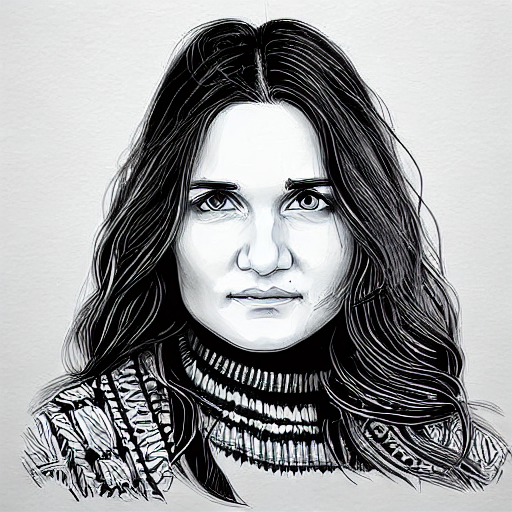

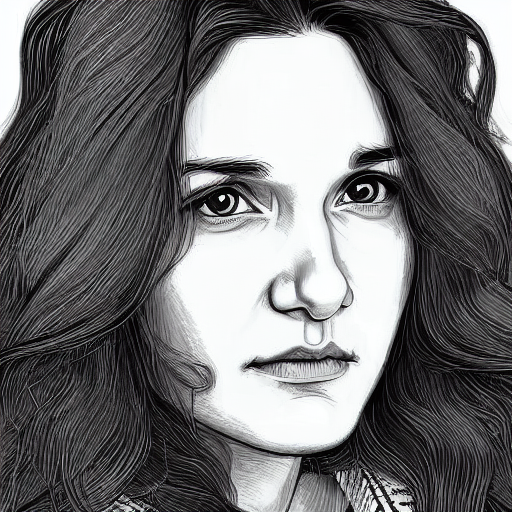

In [16]:
for img in image:
    display(img)